# TKO_7093 Statistical Data Analysis - autumn 2024

Authors:

Chathuranga Liyanage - 2407225

Sameera Varma Pothuri - 2304891

# Data Preparation  

In [137]:
#import required libraries
import pandas as P
import numpy as N
import matplotlib.pyplot as plt
import scipy.stats as S

In [138]:
#Load the data
data = P.read_csv(r"C:\Users\Sameera\Documents\SDA\habits.data", sep=';', na_values = ['?'], index_col = False, header = 0 )

In [139]:
#Check the data
data

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V7,V21,...,V40,V68,V69,V70,V75,H1a_A,H1b_A,H1g_A,H1h_A,H1i_A
0,50007,2,2,2,3.0,6,580,0,20,0,...,0,30,0,0,0,1.0,1.0,2.0,1.0,2.0
1,50009,1,1,2,1.0,7,0,40,0,0,...,0,240,0,60,0,1.0,1.0,2.0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,...,0,310,10,240,0,2.0,1.0,2.0,1.0,2.0
3,50032,2,1,1,2.0,8,0,0,10,0,...,0,0,0,170,0,2.0,2.0,2.0,2.0,2.0
4,50033,1,1,2,1.0,8,00:00,02:10,00:20,00:00,...,00:00,00:30,00:00,01:50,00:00,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,1.0,4,440,30,10,0,...,0,10,0,80,0,1.0,1.0,1.0,2.0,1.0
389,51947,2,1,2,1.0,7,490,0,10,0,...,0,0,0,70,10,1.0,1.0,2.0,1.0,2.0
390,51956,1,1,2,2.0,6,0,30,0,0,...,0,30,0,170,50,1.0,1.0,2.0,1.0,2.0
391,51957,2,2,2,1.0,7,0,10,10,0,...,0,60,0,30,40,2.0,2.0,1.0,1.0,2.0


The total dataset has 393 rows. Now that we have loaded the whole data set, we have to extract only the necessary columns for this project and replace them with more descriptive labels for meaningful exploration. We then rename the values under these variables for further meaningful exploration. We also assign categorical variables as categorical data type. 

In [140]:
#columns_needed = ['kohde','jasen','pvknro','sp','IKAL1','ASALUE','V1','V22','V32','V75','H1b_A','H1i_A']

# Reading only the specified columns
df= data[['kohde','jasen','pvknro','sp','IKAL1','ASALUE','V1','V22','V32','V75','H1b_A','H1i_A']]

#Using 'rename' to replace the column names 
df.rename(columns={'kohde':'household_ID', 'jasen': 'member_ID', 'pvknro': 'day', 'sp': 'sex', 'IKAL1': 'age_group', 
                   'ASALUE': 'living_environment', 'V1': 'working', 'V22' : 'with_children', 'V32' : 'sleeping', 
                   'V75' : 'phone_call', 'H1b_A': 'visit_theater', 'H1i_A' : 'visit_sport_event'}, inplace = True)

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\3905156262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'kohde':'household_ID', 'jasen': 'member_ID', 'pvknro': 'day', 'sp': 'sex', 'IKAL1': 'age_group',


In [141]:
#Rename the values of respective variables.
df.day= P.Categorical(df.day).rename_categories({ 1: 'working_day', 2: 'weekend'})
df.sex= P.Categorical(df.sex).rename_categories({ 1: 'male', 2: 'female'})
df.age_group= P.Categorical(df.age_group).rename_categories({ 1 : '10-14 yrs' ,
                                                             2 : '15-19 yrs' ,
                                                             3 : '20-24 yrs' ,
                                                             4 : '25-34 yrs' ,
                                                             5 : '35-44 yrs' ,
                                                             6 : '45-54 yrs' , 
                                                             7 : '55-64 yrs' , 
                                                             8 : '65-74 yrs' , 
                                                             9 : '75 & above' })
df.living_environment= P.Categorical(df.living_environment).rename_categories({ 1: 'city', 2: 'municipality', 3 :'rural_area'})
df.visit_theater= P.Categorical(df.visit_theater).rename_categories({ 1: 'yes', 2: 'no'})
df.visit_sport_event= P.Categorical(df.visit_sport_event).rename_categories({ 1: 'yes', 2: 'no'})

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2283045107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.day= P.Categorical(df.day).rename_categories({ 1: 'working_day', 2: 'weekend'})
C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2283045107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex= P.Categorical(df.sex).rename_categories({ 1: 'male', 2: 'female'})
C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2283045107.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [142]:
df

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
0,50007,2,weekend,female,45-54 yrs,rural_area,580,0,430,0,yes,no
1,50009,1,working_day,female,55-64 yrs,city,0,0,560,0,yes,yes
2,50015,1,working_day,male,65-74 yrs,rural_area,0,0,450,0,yes,no
3,50032,2,working_day,male,65-74 yrs,municipality,0,0,530,0,no,no
4,50033,1,working_day,female,65-74 yrs,city,00:00,00:00,07:20,00:00,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,weekend,female,25-34 yrs,city,440,0,460,0,yes,yes
389,51947,2,working_day,female,55-64 yrs,city,490,0,470,10,yes,no
390,51956,1,working_day,female,45-54 yrs,municipality,0,0,NaN,50,yes,no
391,51957,2,weekend,female,55-64 yrs,city,0,0,740,40,no,no


The dataset is now more readable. To filter the dataset, we start with checking for duplicate household IDs. 

In [144]:
has_duplicates = df['household_ID'].duplicated().any()
print(f"Are there duplicates in column 'household_ID'? {has_duplicates}")

Are there duplicates in column 'household_ID'? False


Since there are no dupllicate values, we proceed with the exploration of invalid and irrelevant records. 
Now we need to manually check the data for irrelevant data first.  
For Categorical variables, We take value_counts and counts to get grasp their total numbers and different types of values.

In [145]:
#Looping all the categorical variables and their total counts
cat_cols = ['day', 'sex', 'age_group', 'living_environment', 'visit_theater', 'visit_sport_event']
for i in cat_cols:
    print(df[i].value_counts())
    print( f"Number of total counts is {df[i].count()}")
    print("\n")

day
weekend        199
working_day    194
Name: count, dtype: int64
Number of total counts is 393


sex
female    215
male      178
Name: count, dtype: int64
Number of total counts is 393


age_group
45-54 yrs     92
55-64 yrs     90
35-44 yrs     62
65-74 yrs     55
25-34 yrs     51
75 & above    30
20-24 yrs     13
Name: count, dtype: int64
Number of total counts is 393


living_environment
city            249
rural_area       82
municipality     61
Name: count, dtype: int64
Number of total counts is 392


visit_theater
no       188
yes      173
0.0        4
60.0       1
120.0      1
Name: count, dtype: int64
Number of total counts is 367


visit_sport_event
no       228
yes      134
0.0        4
120.0      2
Name: count, dtype: int64
Number of total counts is 368




The total number of rows in the data is 393.
Value counts do not display NAN values.So by this observation we can see that day, sex and age group coulmns have all valid values.In addition, there is only one NaN value in 'living environment' and more NaNs in Theater and Sport event columns.
But Besides NaNs, we can see that there are other INVALID values only in Theater and Sport-event columns
We first deal with these invalid values in the Categorical variable.

In [146]:
#Checking all the invalid values in 'visit_theater', which are not yes, not no and neither NAN
df.loc[(df.visit_theater != 'yes') & (df.visit_theater != 'no') & (df.visit_theater.notna())]

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
84,50406,2,weekend,female,55-64 yrs,municipality,290,0,380,0,0.0,120.0
107,50530,1,weekend,male,55-64 yrs,city,460,0,500,20,120.0,0.0
111,50550,2,weekend,male,45-54 yrs,city,550,0,480,0,0.0,0.0
137,50666,2,working_day,male,75 & above,city,0,0,600,0,60.0,120.0
147,50737,1,working_day,male,65-74 yrs,city,0,0,540,30,0.0,0.0
218,51074,1,working_day,female,45-54 yrs,rural_area,400,0,480,0,0.0,0.0


Looking at the invalid values as well as value_counts, we can assume that the same set of 6 rows are taken as neither yes, nor No, nor NAN. It would be reasonable to assume that the values shown here reflect the time spent in minutes in theater and sports, rather than mere attendance.Therefore, instead of removing these rows, we should replace 120 and 60 with "yes" and all 0s with "no. 

In [147]:
#Replace the invalid values
df['visit_theater'] = df['visit_theater'].replace({120.0 : 'yes', 60.0 : 'yes', 0.0: 'no'})

#Check the output using value counts
df.visit_theater.value_counts()

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2988611200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visit_theater'] = df['visit_theater'].replace({120.0 : 'yes', 60.0 : 'yes', 0.0: 'no'})


visit_theater
no     192
yes    175
Name: count, dtype: int64

Follow the same procedure for visit_sport_event to replace invalid values

In [148]:
df.loc[(df.visit_sport_event != 'yes') & (df.visit_sport_event != 'no') & (df.visit_sport_event.notna())]

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
84,50406,2,weekend,female,55-64 yrs,municipality,290,0,380,0,no,120.0
107,50530,1,weekend,male,55-64 yrs,city,460,0,500,20,yes,0.0
111,50550,2,weekend,male,45-54 yrs,city,550,0,480,0,no,0.0
137,50666,2,working_day,male,75 & above,city,0,0,600,0,yes,120.0
147,50737,1,working_day,male,65-74 yrs,city,0,0,540,30,no,0.0
218,51074,1,working_day,female,45-54 yrs,rural_area,400,0,480,0,no,0.0


We can say our assumption is right by looking at the same set of index numbers of the rows that have invalid values in both theater and sports columns. 

In [149]:
#replace invalid values in the sports column
df['visit_sport_event'] = df['visit_sport_event'].replace({120.0 : 'yes', 60.0 : 'yes', 0.0: 'no'})

#Check the output using value counts
df.visit_sport_event.value_counts()

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\238923463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visit_sport_event'] = df['visit_sport_event'].replace({120.0 : 'yes', 60.0 : 'yes', 0.0: 'no'})


visit_sport_event
no     232
yes    136
Name: count, dtype: int64

All we are left with are NaN values in the categorical variables. 

In [150]:
#Printing all the NaN rows in all three columns
df.loc[(df['living_environment'].isna()) | (df['visit_theater'].isna()) | (df['visit_sport_event'].isna())]

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
11,50074,2,working_day,male,35-44 yrs,city,0,0,620,0,NaN,NaN
18,50097,1,working_day,male,45-54 yrs,city,0,0,420,0,NaN,yes
31,50152,1,weekend,female,35-44 yrs,city,10,0,530,20,yes,NaN
32,50160,1,weekend,male,35-44 yrs,city,170,0,560,0,NaN,NaN
42,50218,2,working_day,female,75 & above,city,0,0,550,0,NaN,NaN
56,50288,1,weekend,female,45-54 yrs,city,0,0,490,0,NaN,NaN
65,50315,2,working_day,male,45-54 yrs,city,480,0,470,10,NaN,NaN
69,50343,1,weekend,female,20-24 yrs,municipality,150,0,560,40,NaN,NaN
70,50351,2,working_day,male,75 & above,city,0,0,370,0,NaN,no
77,50382,2,working_day,male,45-54 yrs,city,460,0,430,0,NaN,NaN


In [151]:
#Remove NaNs in categorical variables
condition = (df['living_environment'].isna()) | (df['visit_theater'].isna()) | (df['visit_sport_event'].isna())
df = df.loc[~condition]
df

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
0,50007,2,weekend,female,45-54 yrs,rural_area,580,0,430,0,yes,no
1,50009,1,working_day,female,55-64 yrs,city,0,0,560,0,yes,yes
2,50015,1,working_day,male,65-74 yrs,rural_area,0,0,450,0,yes,no
3,50032,2,working_day,male,65-74 yrs,municipality,0,0,530,0,no,no
4,50033,1,working_day,female,65-74 yrs,city,00:00,00:00,07:20,00:00,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,weekend,female,25-34 yrs,city,440,0,460,0,yes,yes
389,51947,2,working_day,female,55-64 yrs,city,490,0,470,10,yes,no
390,51956,1,working_day,female,45-54 yrs,municipality,0,0,NaN,50,yes,no
391,51957,2,weekend,female,55-64 yrs,city,0,0,740,40,no,no


In [152]:
#The memberID column cannot seem to be grouped as either categorical or quantitative variable for analysis purposes. 
#It is an indicator variable. So we separately check for its value counts just to rule out anu invalid values in it.
df.member_ID.value_counts()

member_ID
1    220
2    142
Name: count, dtype: int64

After filtering for categorical variables, we are left with 362 rows.
Next, we proceed to analyze the numerical variables, starting with checking for invalid values in the quantitative variables.
The quantitative variables are 'working','with_children', 'sleeping' and 'phone_call'.

We can see that there are certain values that are in hh:mm format which need to be converted into their respective minutes.

In [153]:
# Define function to convert hh:mm to minutes
# We decided to use try and except because we observed that the columns have a mixed types of observations including 
# strings and float types. All the hh:mm formatted values are in string type. 
# Therefore, the conversion may not apply to observations other than strings.  
# This code will ensure that if conversion fails on some observations,it will return their original values. 
def convert_to_minutes(value):
    try:
        if isinstance(value, str) and len(value) == 5 and value[2] == ':':
            hours, minutes = map(int, value.split(':'))
            return hours * 60 + minutes  
        return value
    except Exception as e:
        return value  

# Apply the function to all the quantitative columns
df['working'] = df['working'].apply(convert_to_minutes)
df['with_children'] = df['with_children'].apply(convert_to_minutes)
df['sleeping'] = df['sleeping'].apply(convert_to_minutes)
df['phone_call'] = df['phone_call'].apply(convert_to_minutes)

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2952551958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['working'] = df['working'].apply(convert_to_minutes)
C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2952551958.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['with_children'] = df['with_children'].apply(convert_to_minutes)
C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\2952551958.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [154]:
df

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
0,50007,2,weekend,female,45-54 yrs,rural_area,580,0,430,0,yes,no
1,50009,1,working_day,female,55-64 yrs,city,0,0,560,0,yes,yes
2,50015,1,working_day,male,65-74 yrs,rural_area,0,0,450,0,yes,no
3,50032,2,working_day,male,65-74 yrs,municipality,0,0,530,0,no,no
4,50033,1,working_day,female,65-74 yrs,city,0,0,440,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,weekend,female,25-34 yrs,city,440,0,460,0,yes,yes
389,51947,2,working_day,female,55-64 yrs,city,490,0,470,10,yes,no
390,51956,1,working_day,female,45-54 yrs,municipality,0,0,NaN,50,yes,no
391,51957,2,weekend,female,55-64 yrs,city,0,0,740,40,no,no


We now only have NaNs to deal with.

In [156]:
is_na = df[df.isna().any(axis=1)]
is_na

,household_ID,member_ID,day,sex,age_group,living_environment,working,with_children,sleeping,phone_call,visit_theater,visit_sport_event
44,50230,2,working_day,male,45-54 yrs,city,440,0,350,NaN,no,no
58,50295,1,weekend,female,65-74 yrs,city,NaN,0,500,10,yes,yes
91,50465,2,weekend,male,55-64 yrs,city,0,0,560,NaN,yes,no
101,50497,2,working_day,female,45-54 yrs,rural_area,0,0,620,NaN,no,no
169,50844,1,weekend,male,55-64 yrs,city,0,0,NaN,0,no,no
186,50928,1,weekend,male,55-64 yrs,municipality,0,0,NaN,0,yes,no
214,51053,1,working_day,female,45-54 yrs,rural_area,0,0,540,NaN,no,no
216,51060,1,working_day,female,25-34 yrs,city,0,NaN,590,0,yes,no
237,51176,2,working_day,male,55-64 yrs,city,0,NaN,430,0,no,yes
239,51181,1,working_day,male,55-64 yrs,city,0,0,NaN,0,no,no


This step reveals the 16 rows with NaN values. We already removed around 30 observations within categorical variables.

Since this set of NANs in the quantitative varibales is only a small proportion of values, we can replace the NaNs with 0's.

In [157]:
df.dtypes

household_ID             int64
member_ID                int64
day                   category
sex                   category
age_group             category
living_environment    category
working                 object
with_children           object
sleeping                object
phone_call              object
visit_theater         category
visit_sport_event     category
dtype: object

We cannot change the NaNs to 0s while the quantitative variables are identified as objects. 
We first need to change the category of the column to int.

In [158]:
columns_to_convert = ['working','with_children','sleeping','phone_call']
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: P.to_numeric(col, errors='ignore').fillna(0).astype(int))

C:\Users\Sameera\AppData\Local\Temp\ipykernel_12636\3398502124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].apply(lambda col: P.to_numeric(col, errors='ignore').fillna(0).astype(int))


In [159]:
df.dtypes #Checking for dtypes if they really have changed. 

household_ID             int64
member_ID                int64
day                   category
sex                   category
age_group             category
living_environment    category
working                  int32
with_children            int32
sleeping                 int32
phone_call               int32
visit_theater         category
visit_sport_event     category
dtype: object

With this step, we have gathered all the valid values in the data.

# Data Visualisation

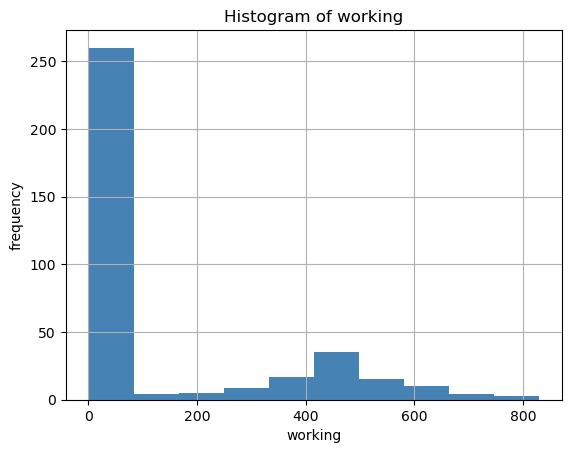

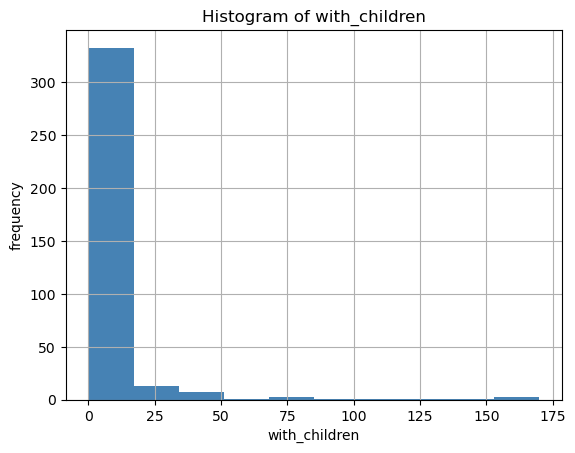

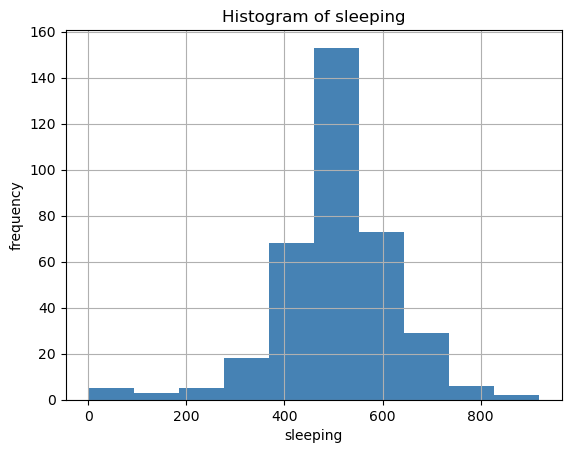

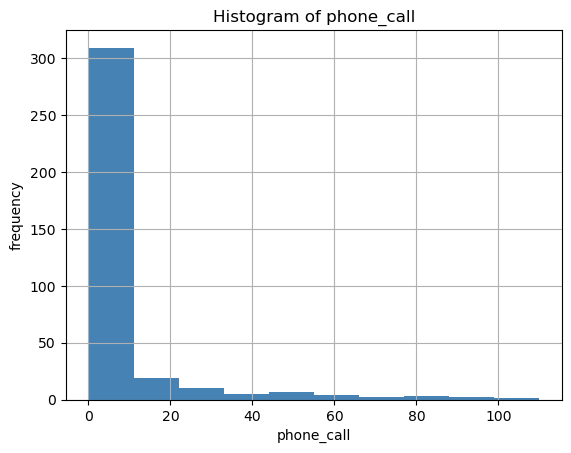

In [160]:
#creating histograms for all quant cols
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    df[i].hist(color = ['steelblue'])
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

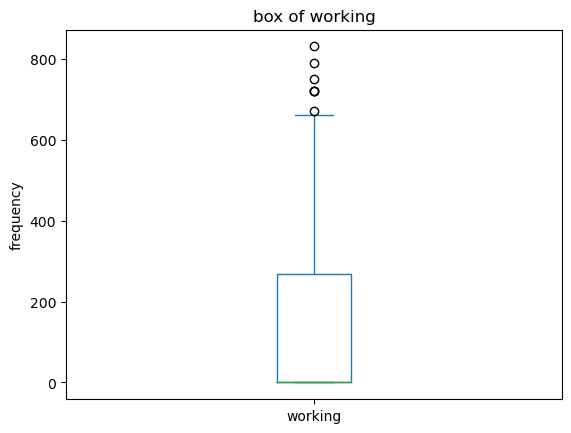

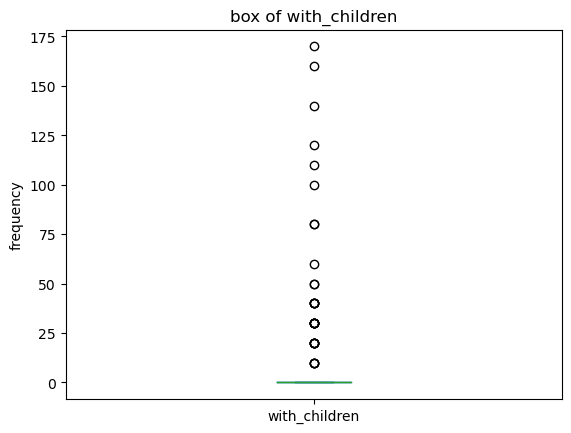

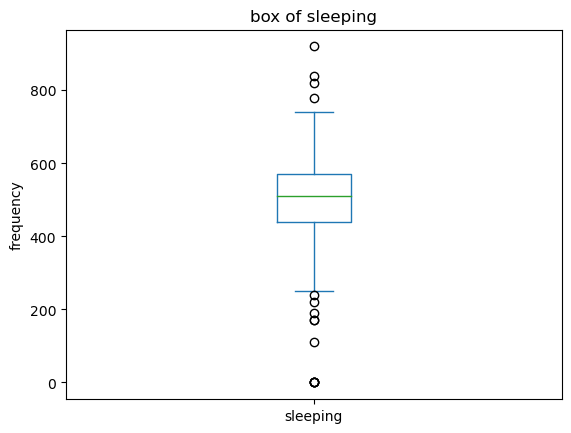

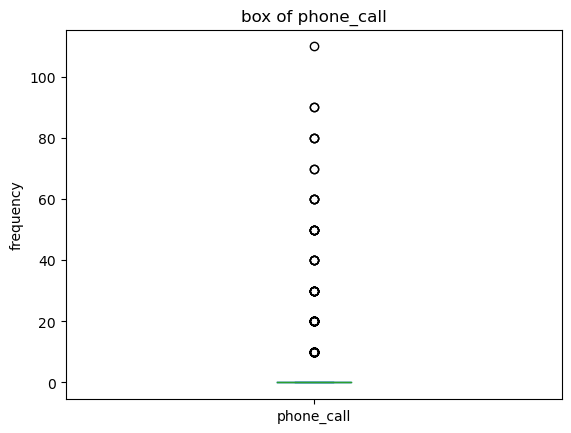

In [161]:
#Also checking box plots
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    df[i].plot.box()
    plt.title(f'box of {i}')
    #plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show() 

To improve the normality of the data, we examine the histograms and boxplots to identify and address potential outliers on a column-by-column basis:

Working column:

We do not remove any values from the working column. It could be that people who work multiple part-time work might spent large amounts of time working. removing these values might impact the authenticity of the analysis. 

With_children column:

While the histogram and boxplot show a few high values (e.g., up to 175 minutes spent with children), these may not truly be outliers. It's plausible that individuals who stay at home or work in child-care could legitimately spend significant time with children. Considering this context, we choose not to remove any values from this column.

Sleeping column:

Moving on to sleeping column, since it's unlikely that people sleep less than 2:30 hours and more than 15hours, they could be outliers. So we remove those values. 

<Axes: ylabel='Frequency'>

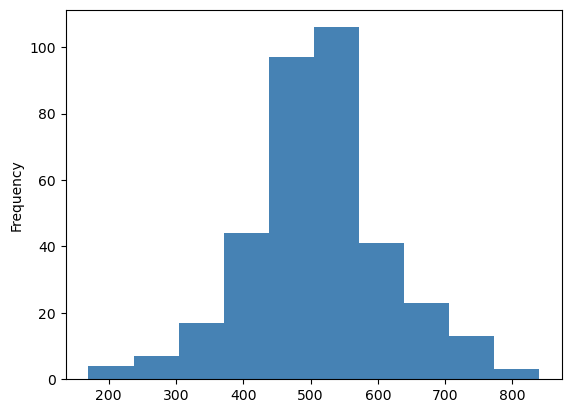

In [162]:
#Removing the outliers from the sleeping
df = df[(df.sleeping > 150 )& (df.sleeping < 900)]

df.sleeping.plot.hist(color = ['steelblue'])

As we can see in the histogram after removing the outliers, the distribution looks a lot better. 

Phone call column:

We can see that not many people spent time on phone calls. There are only few with values as high as 150 minutes. which is 2.30 hours. It's possible that people really spend that long. So we do not remove any values from that either. 

# 1. Characterise the individuals that are present in the data. Are there groups of similar persons?

[<Axes: title={'center': 'day'}, ylabel='count'>]
[<Axes: title={'center': 'sex'}, ylabel='count'>]
[<Axes: title={'center': 'age_group'}, ylabel='count'>]
[<Axes: title={'center': 'living_environment'}, ylabel='count'>]
[<Axes: title={'center': 'visit_theater'}, ylabel='count'>]
[<Axes: title={'center': 'visit_sport_event'}, ylabel='count'>]


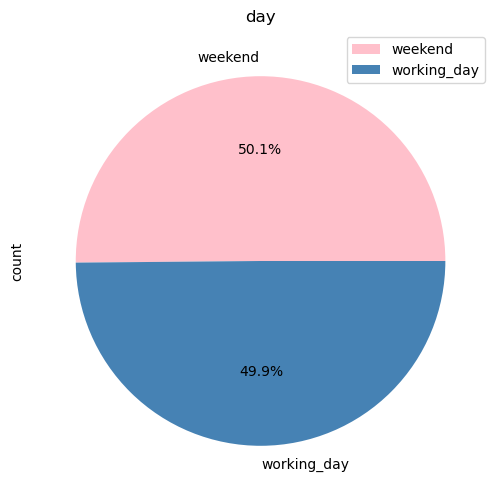

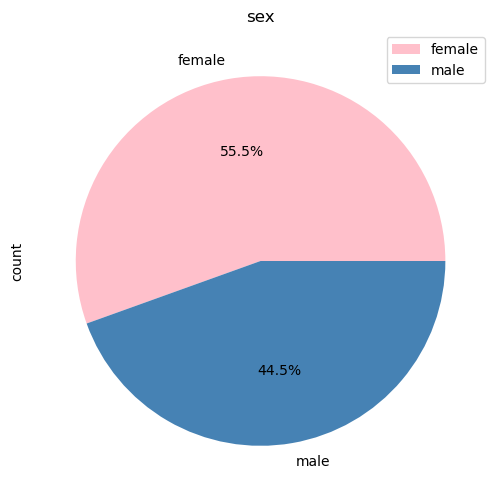

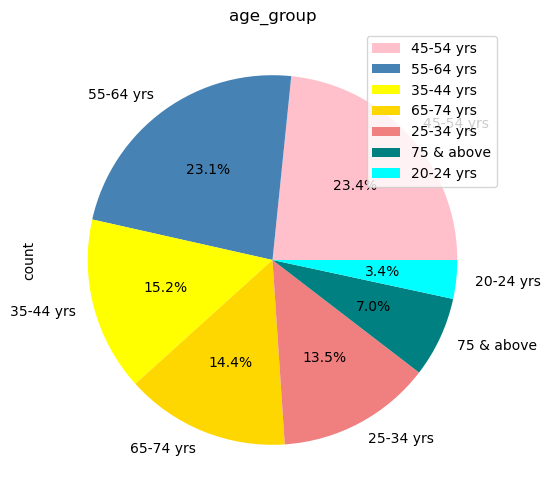

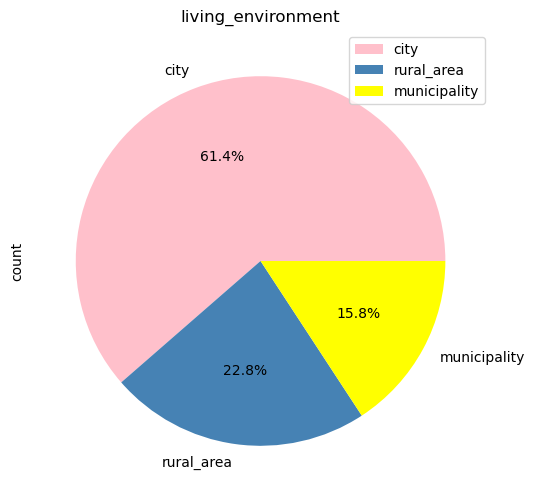

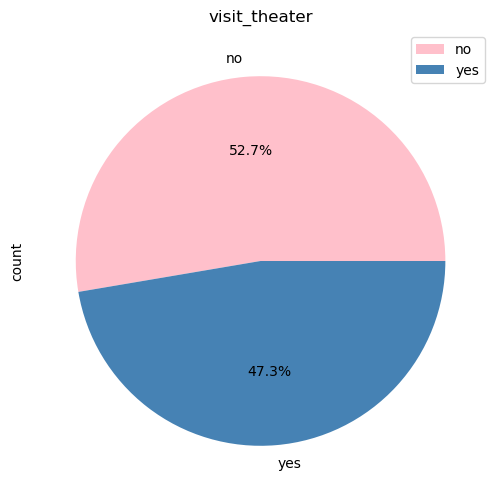

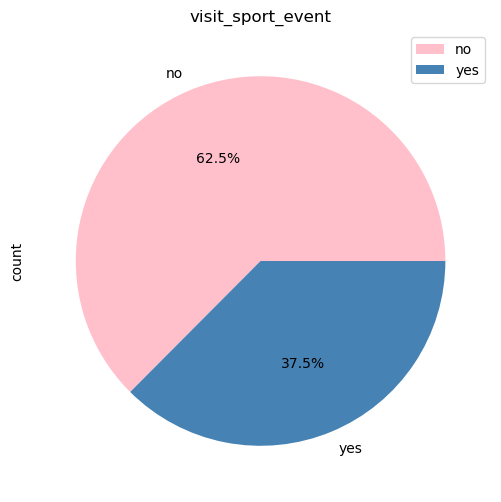

In [163]:
#Looping all the categorical variables and their total counts to visualize their proportions
cat_cols = ['day', 'sex', 'age_group', 'living_environment', 'visit_theater', 'visit_sport_event']
for i in cat_cols:
    colors = ['pink', 'steelblue', 'yellow','gold', 'lightcoral', 'teal', 'cyan']
    plt.figure(figsize=(6, 6))
    plt.title(i)
    print(df[i].value_counts().plot.pie( subplots = True, legend = True, colors = colors, autopct='%1.1f%%' ))

In the above visualization, the proportions of groups within each categorical variable are clearly visible:

Day:
There are roughly equal numbers of weekdays and weekends in the sample.

Sex:
The sample shows a disproportionate representation, with more females than males. This imbalance could skew results if analyses are divided by gender.

Age Group:
The majority of individuals belong to the 55-64 age group, followed by 45-54, 35-44, 65-74, 24-34, and 75 and above in descending order.
The 20-24 age group has the smallest representation.

Living Environment:
Most participants are from cities, some from rural areas, and the smallest group resides in municipalities.

Theater Visits:
More than half of the participants reported visiting the theater.

Sports Events:
A little over a quarter of the participants attended sports events.

<Axes: title={'center': 'Numerical variables in a bar chart'}>

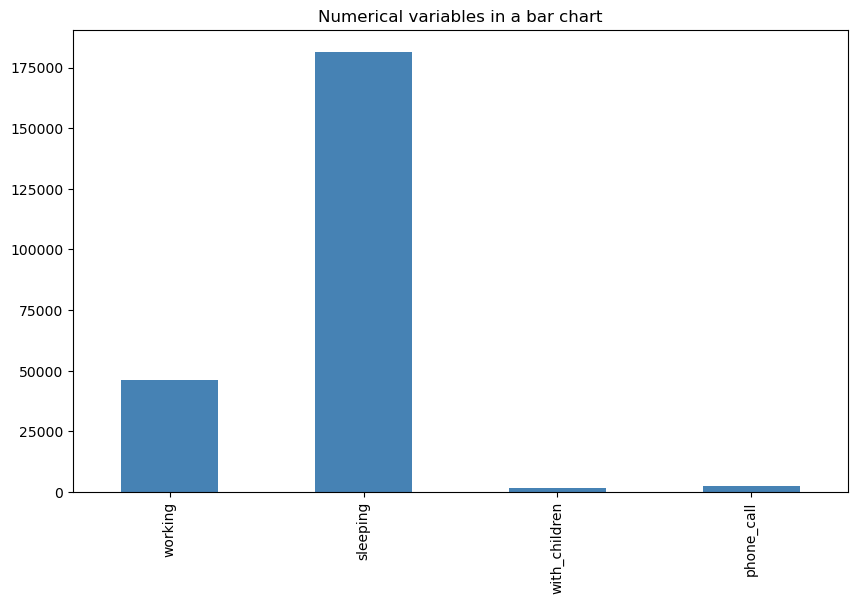

In [164]:
# Now we visualize quantitative variables to see their proportions, using bar graph.
quant_cols = df[['working','sleeping','with_children','phone_call']].sum()

# Plot the grouped DataFrame as a bar plot
quant_cols.plot(kind='bar',figsize=(10, 6), title='Numerical variables in a bar chart', color = 'steelblue')


Looking at the quantitative varibles, more number of people seem to be spending their time sleeping compared to other habits. 

Now we visualize the numerical column values with respect to each categorical column and look for interesting patterns and trends. 

Habits by Day:

[<Axes: title={'center': 'Day'}, ylabel='count'>]


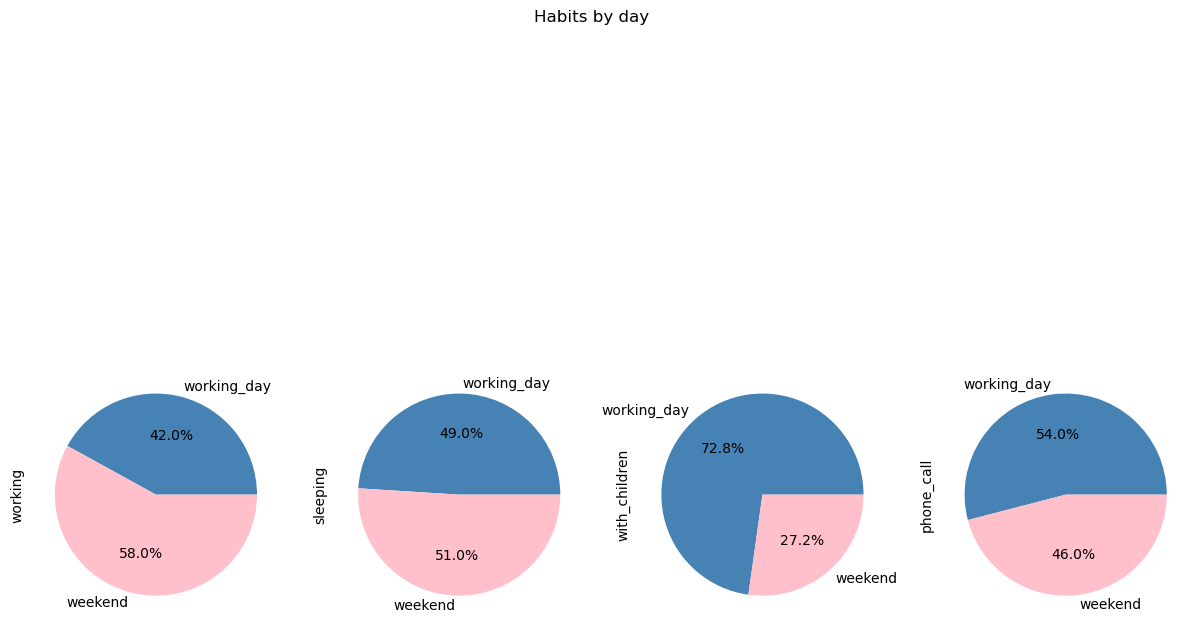

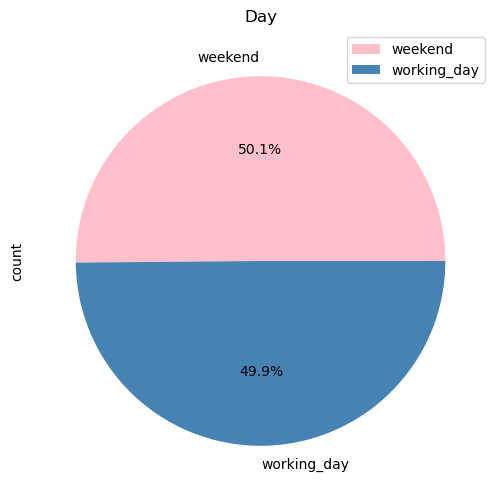

In [165]:
colors = ['pink', 'steelblue']
# Group by 'day' and aggregate all numerical columns
grouped_df = df.groupby('day')[['working', 'sleeping','with_children','phone_call']].sum()

# Plot the grouped DataFrame as a pie chart first
grouped_df.plot(kind='pie',subplots=True, figsize=(15, 10),autopct='%1.1f%%', title='Habits by day', colors = ['steelblue', 'pink'], legend = False,)

#Now showing the pie chart visualising the proportion of type of day data for better analysis
plt.figure(figsize=(6, 6))
plt.title('Day')
print(df['day'].value_counts().plot.pie( subplots = True, legend = True, colors = colors, autopct='%1.1f%%'))

Habits by Sex: 

[<Axes: title={'center': 'Sex'}, ylabel='count'>]


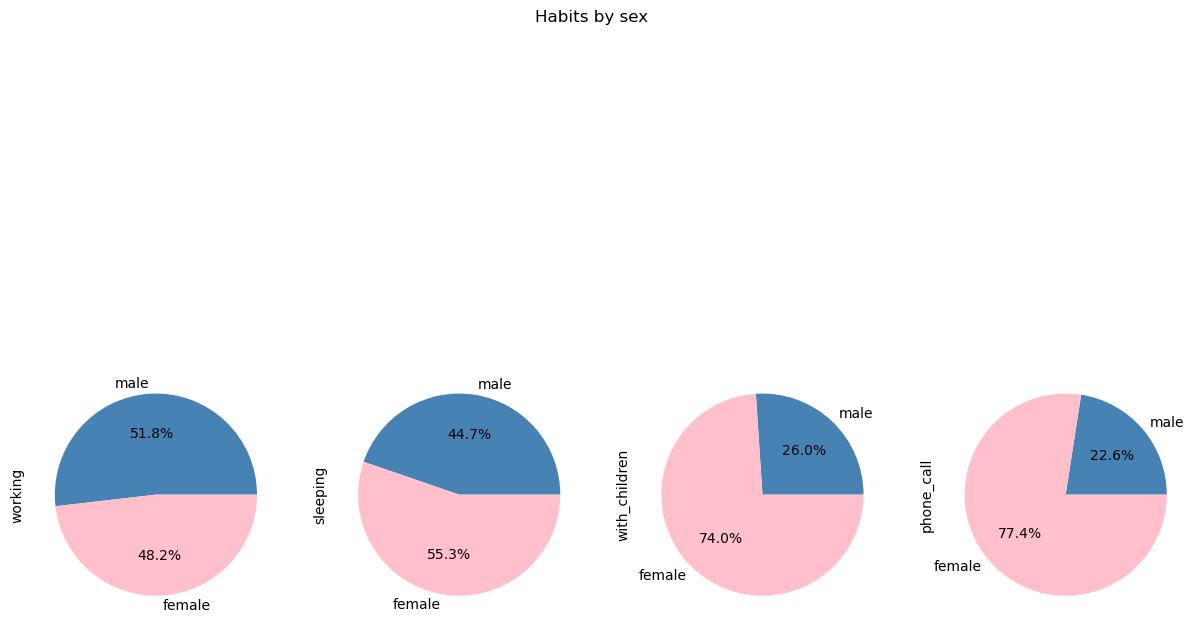

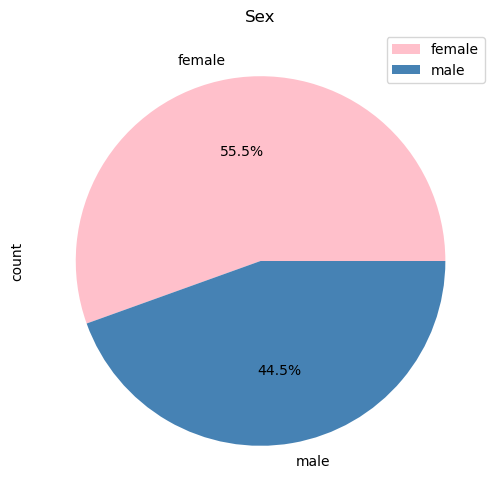

In [166]:
colors = ['pink', 'steelblue']
# Group by 'sex' and aggregate all numerical columns
grouped_df = df.groupby('sex')[['working', 'sleeping','with_children','phone_call']].sum()

# Plot the grouped DataFrame as a pie chart first
grouped_df.plot(kind='pie',subplots=True, figsize=(15, 10),autopct='%1.1f%%', title='Habits by sex', colors = ['steelblue', 'pink'], legend = False)

#Now showing the pie chart visualising the proportion of sex data for better analysis
plt.figure(figsize=(6, 6))
plt.title('Sex')
print(df['sex'].value_counts().plot.pie( subplots = True, legend = True, colors = colors, autopct='%1.1f%%' ))

Habits by Age Group:

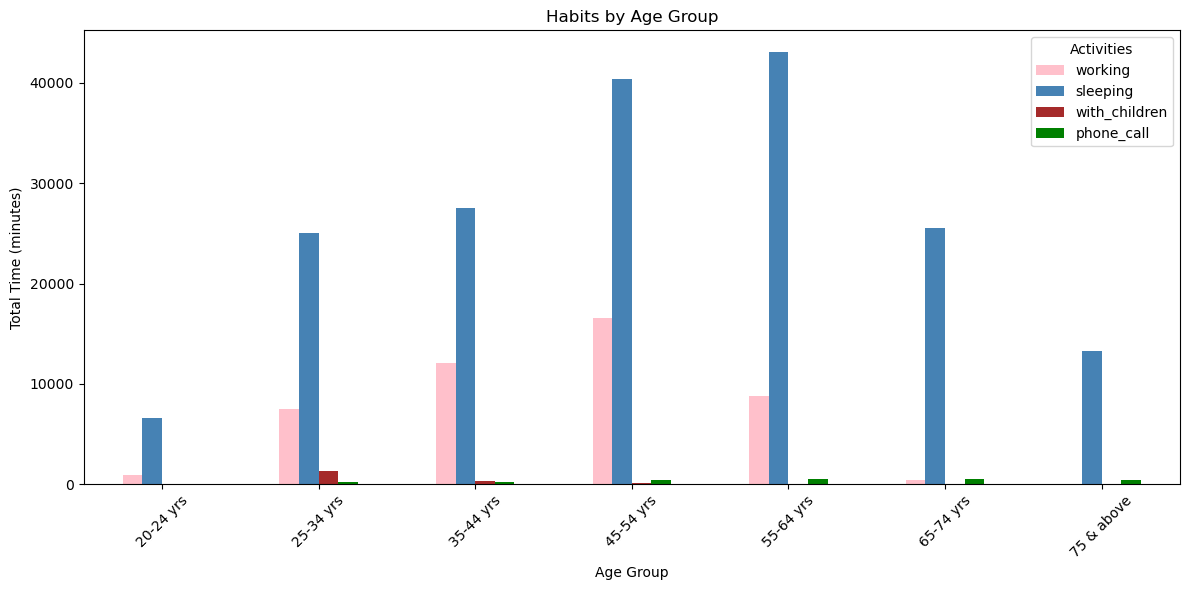

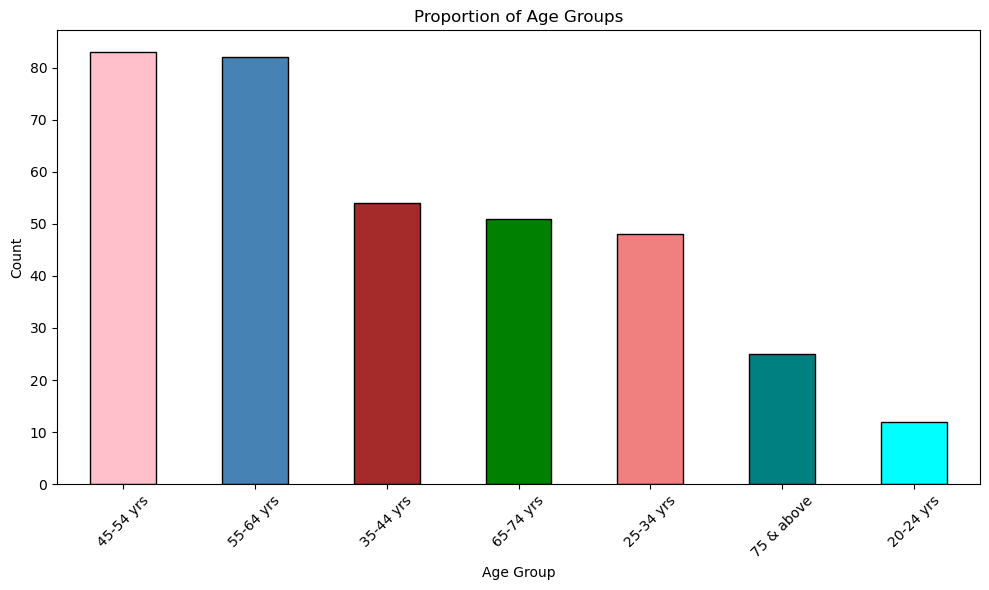

In [167]:
#We decided to use bar graph for age group because there are multiple variable groups and it would be nicer to read on a bar chart.
colors = ['pink', 'steelblue', 'brown','green', 'lightcoral', 'teal', 'cyan']
# Group by 'age group' and aggregate all numerical columns
grouped_df = df.groupby('age_group')[['working', 'sleeping','with_children','phone_call']].sum()

# Bar chart for habits by age_group
grouped_df.plot(kind='bar', figsize=(12, 6), title='Habits by Age Group', color=colors)
plt.ylabel('Total Time (minutes)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility  since the labels are long
plt.legend(title="Activities")
plt.tight_layout()
plt.show()


#Now showing the pie chart visualising the proportion of age group data for better analysis
plt.figure(figsize=(10, 6))
df['age_group'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Proportion of Age Groups')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=45) # Rotating x-axis labels for better visibility since the labels are long
plt.tight_layout()
plt.show()

Habits by Living Environment:

[<Axes: title={'center': 'living environment'}, ylabel='count'>]


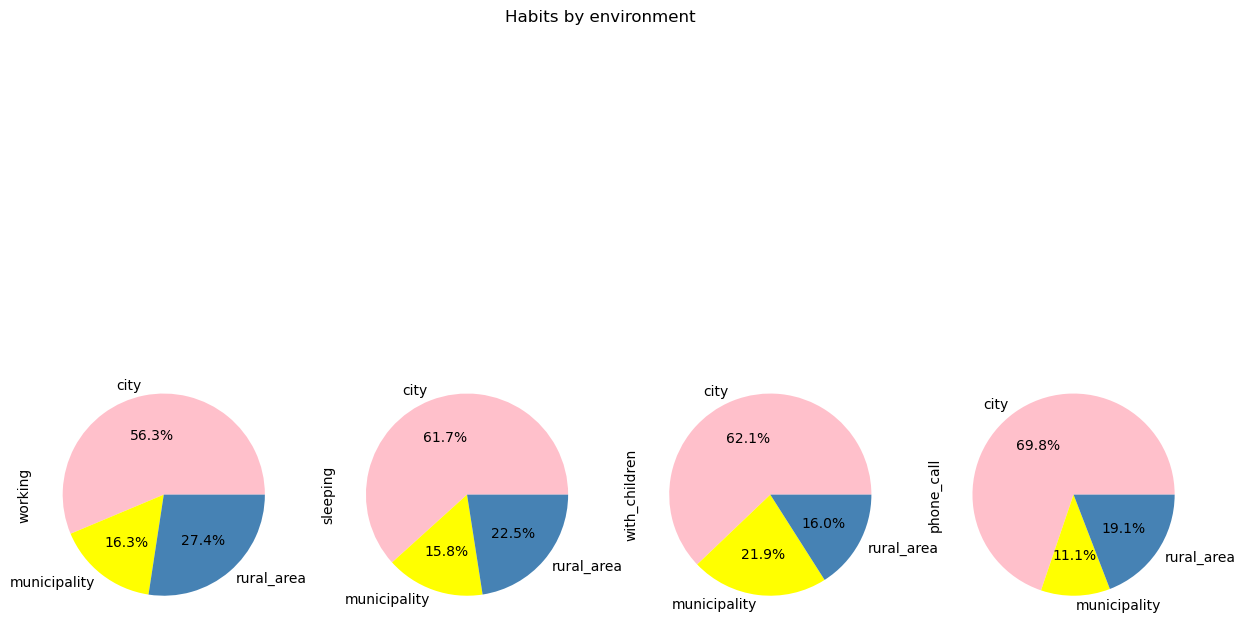

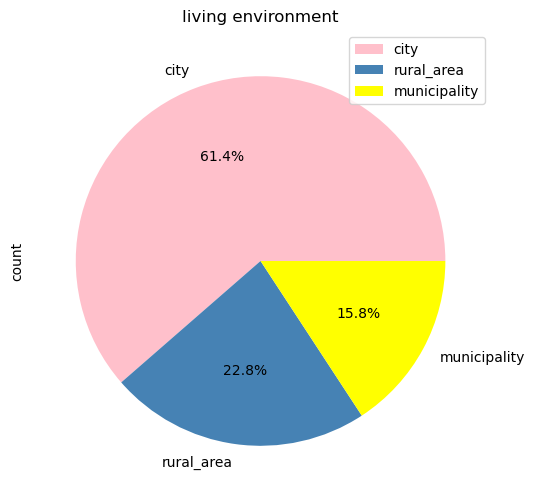

In [168]:
colors = ['pink', 'steelblue','yellow']
# Group by 'day' and aggregate all numerical columns
grouped_df = df.groupby('living_environment')[['working', 'sleeping','with_children','phone_call']].sum()

# Plot the grouped DataFrame as a pie chart first
grouped_df.plot(kind='pie',subplots=True, figsize=(15, 10), title='Habits by environment', autopct='%1.1f%%', colors = ['pink', 'yellow','steelblue'], legend = False)

#Now showing the pie chart visualising the proportion of living-environment data for better analysis
plt.figure(figsize=(6, 6))
plt.title('living environment')
print(df['living_environment'].value_counts().plot.pie( subplots = True, legend = True, colors = colors, autopct='%1.1f%%' ))

Observations from Pie Charts for Categorical Variables with Respect to Habits:

1. Day

Work:
The pie chart reveals that people are working more on weekends than on weekdays, which is counterintuitive. The high working hours on weekends could indicate the proportion of people working non-traditional jobs (e.g., service industry or freelance work).

Time with Children:
Surprisingly, individuals spend almost three-fourths of their time with children during weekdays compared to weekends. This is also counterintuitive to some extent.

Phone Calls:
As expected, people spend more time on phone calls during weekends than weekdays.

Sleeping:
Regardless of the day, the amount of time spent sleeping appears consistent because it's a basic need.
Contrasting these findings with the pie chart for the distribution of weekdays and weekends (which is nearly equal), we can conclude that these observations are reliable.

2. Sex

There are more females than males in the sample.

Work: 
Despite the population gap, males work longer hours than females.

Other Habits: 
Females spend more time on activities like sleeping, spending time with children, and phone calls. This could be influenced by their larger representation in the sample.

3. Age Group

Work:
The working distribution aligns predictably with age groups. The most productive age group is 45-54 years, followed by 35-44 years and 55-64 years. The least time spent working is by those of 65-74 years (likely retired) and 20-24 years (likely still studying). People from above 75 years are not working at all, which is understandable. 

Sleeping:
The age groups spending more time working (35-44, 45-54, and 55-64 years) also sleep the most.

Time with Children:
Only three age groups are observed to be spending time with children. 25-34 years spend the most time with children, likely because they are young parents caring for young children.
Other age groups show minimal time spent.

Phone Calls:
The 20-24 age group do not spent time on phone calls, possibly because they engage more with social media instead.
The over-all population of people who are aged 75 years and above is relatively small but their engagement with phone calls is high in relation to their small population. In a broader perspective, they are not spending any time either working or with children. Thus, it is obvious that they would spend more time connecting with people on the phone. 


4. Living Environment

The majority of participants live in cities, followed by rural areas and municipalities. 

sleeping:
The percentage of sleeping by people from different living environments follows the population proportions alomst exactly. In addition, the proportion of phone call in a city has an edge over other environments. One interpretation could be that the city people depend more on phones for connecting with people while others in rural and municipalities prefer connecting in-person.

Other Habits:
The distribution of time spent on different habits generally reflects the population proportions of these living environments.


Common Takeaways:
Categories like sex and age group show some patterns in relation to working times and time spent with children, based on their gender roles and age-related responsibilities. 
Sleeping habits remain relatively unchanged across all the categories. 


### Now we plot the relation between categorical variables and categorical habits.


In the categorical habit columsn, the values are in 'yes' and 'no' form. We are only interested in the number of 'yes's. That would show only the people who visited the respective theater and sport events.

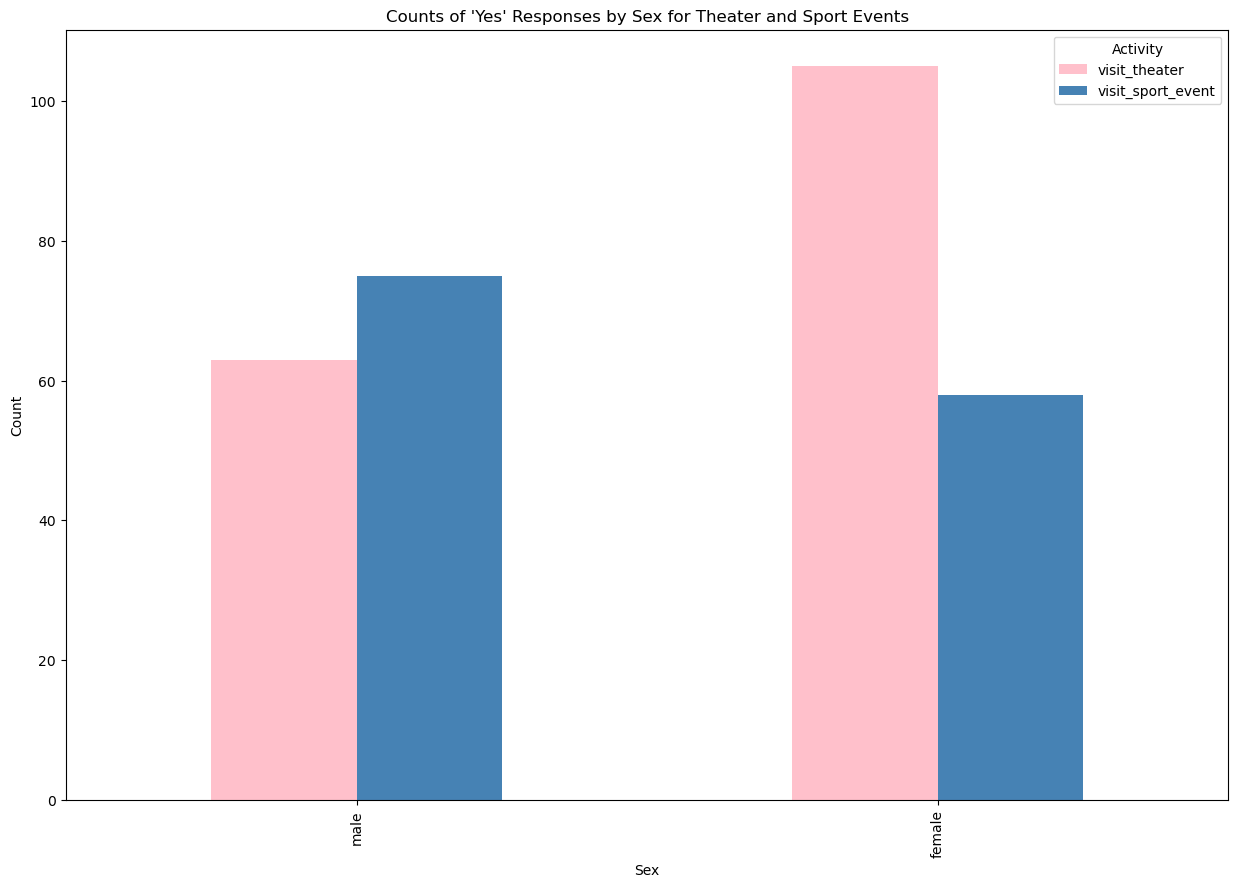

In [169]:
# 
#Filter for "yes" in both columns
filtered_df = df[(df['visit_theater'] == 'yes') | (df['visit_sport_event'] == 'yes')]

# Group by 'sex' and count "yes" for each column
counts = filtered_df.groupby('sex')[['visit_theater', 'visit_sport_event']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot the counts as a bar chart
counts.plot.bar(figsize=(15, 10),color = ['pink','steelblue'], title="Counts of 'Yes' Responses by Sex for Theater and Sport Events")

# Add labels
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Activity")
plt.show()

From this we can see that there are more females going to theater and more males are visiting sports.

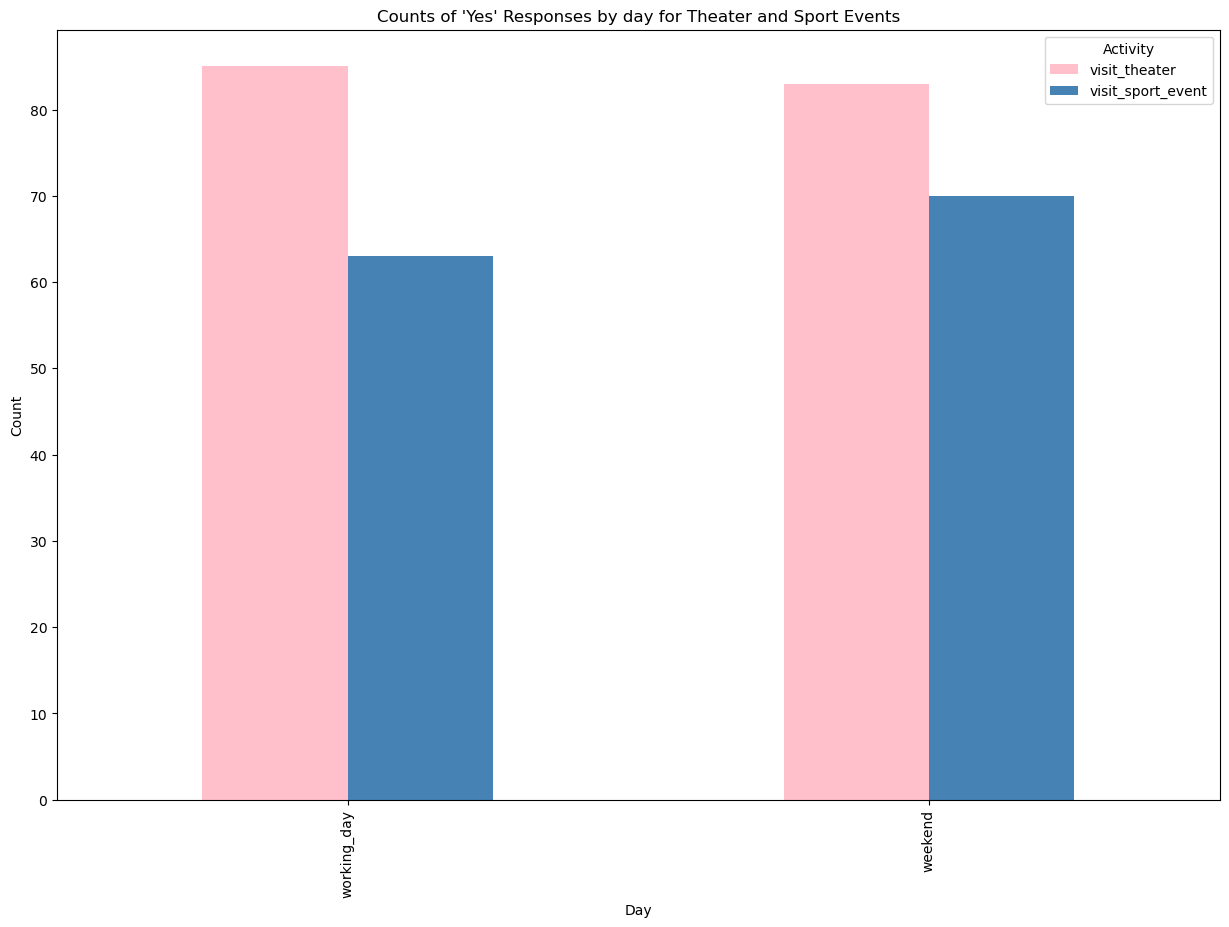

In [170]:
# Group by 'sex' and count "yes" for each column
counts = filtered_df.groupby('day')[['visit_theater', 'visit_sport_event']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot the counts as a bar chart
counts.plot.bar(figsize=(15, 10), color = ['pink','steelblue'], title="Counts of 'Yes' Responses by day for Theater and Sport Events")

# Add labels

plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Activity")
plt.show()

We see the same pattern here as well; more people going to theater than they are to sports. However slightly more people are spenting more time on sport events on weekends compared to working days. 

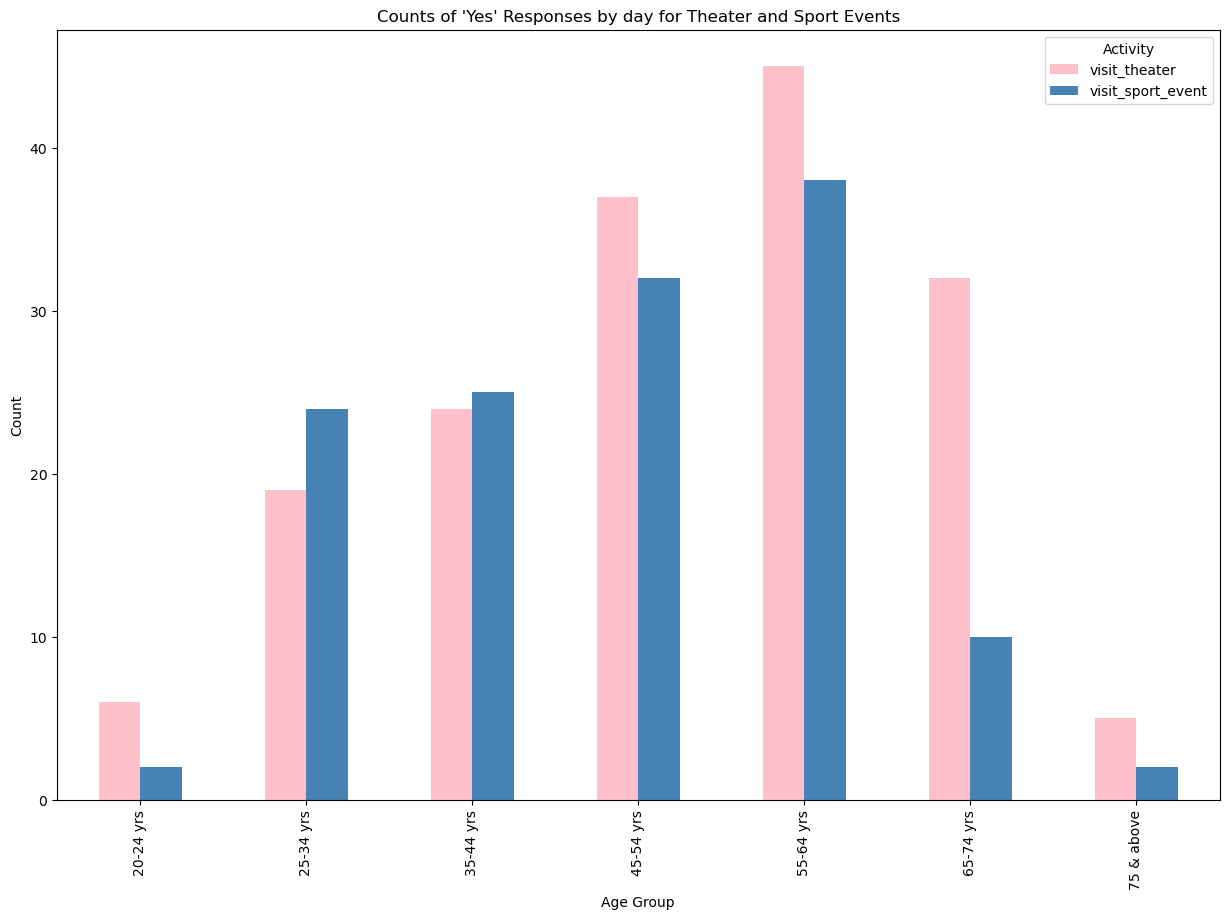

In [171]:
# Group by 'sex' and count "yes" for each column
counts = filtered_df.groupby('age_group')[['visit_theater', 'visit_sport_event']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot the counts as a bar chart
counts.plot.bar(figsize=(15, 10),color = ['pink','steelblue'], title="Counts of 'Yes' Responses by day for Theater and Sport Events")

# Add labels

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Activity")
plt.show()

In two groups of ages ( 25-34 and 35-44 years) more people are going to sports compared to theater. It's the opposite in all other groups;There are more people going to theater comapred to sport. In addition, in the 65-74 age group, there's vast number of people visiting theater comapred to sports. 

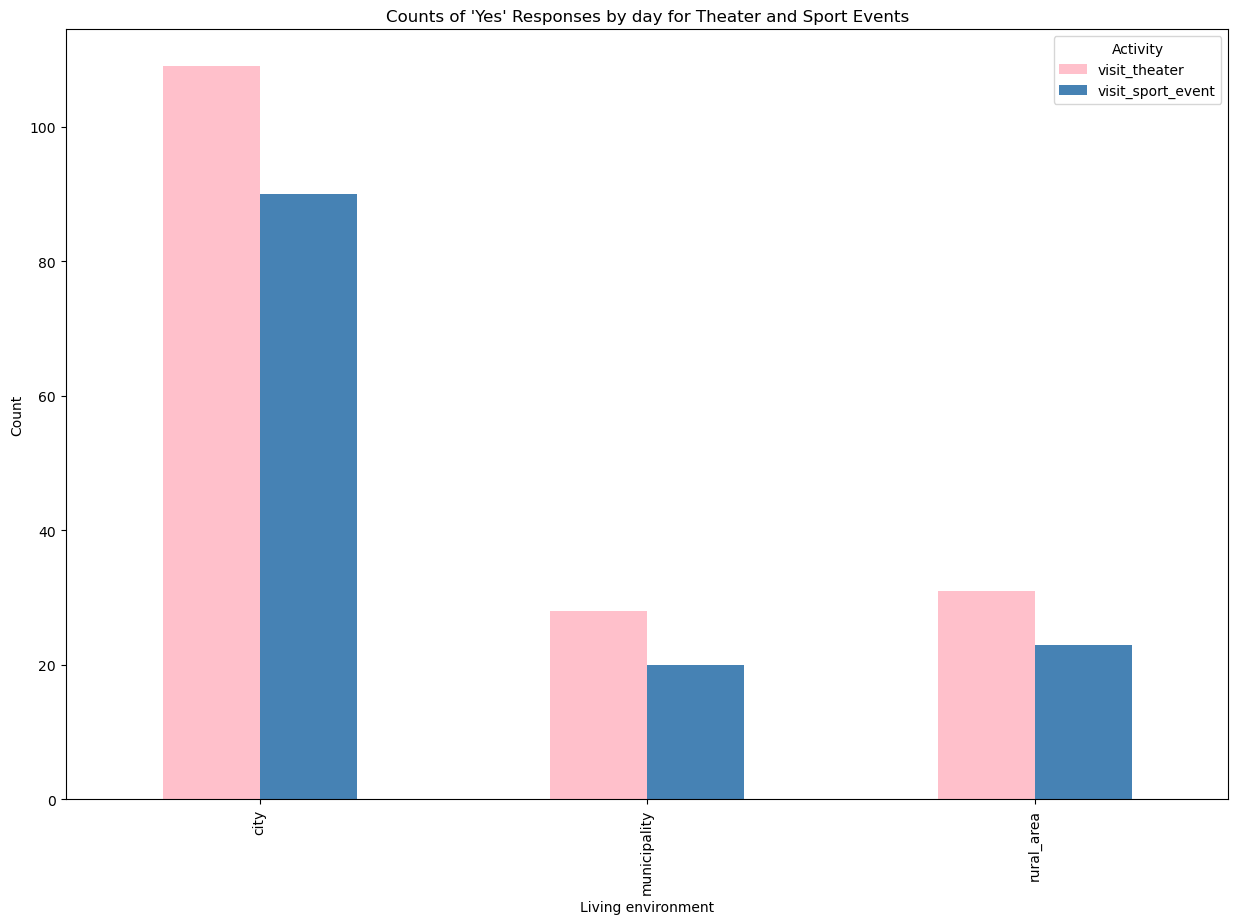

In [172]:
# Group by 'sex' and count "yes" for each column
counts = filtered_df.groupby('living_environment')[['visit_theater', 'visit_sport_event']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot the counts as a bar chart
counts.plot.bar(figsize=(15, 10),color = ['pink','steelblue'], title="Counts of 'Yes' Responses by day for Theater and Sport Events")

# Add labels

plt.xlabel("Living environment")
plt.ylabel("Count")
plt.legend(title="Activity")
plt.show()

There seems to be more people going to theaters than they are to sport events. This could just be a reflection of the fact that sport events are not as frequently organized as theater shows. 

# 2. Estimate how much time on average households spend daily on each activity.

In [173]:
#Getting the mean summary results
mean_summary = df[['working', 'sleeping', 'with_children', 'phone_call']].mean()
min_summary = df[['working', 'sleeping', 'with_children', 'phone_call']].min()
max_summary = df[['working', 'sleeping', 'with_children', 'phone_call']].max()
sum_summary = df[['working', 'sleeping', 'with_children', 'phone_call']].sum()
std_summary = df[['working', 'sleeping', 'with_children', 'phone_call']].std()

In [174]:
print (f"mean value: \n{mean_summary} \n")
print (f"min value: \n{min_summary} \n")
print (f"max value: \n{max_summary} \n")
print (f"sum value: \n{sum_summary} \n")
print (f"std value: \n{std_summary} \n")


mean value: 
working          129.887324
sleeping         510.929577
with_children      4.760563
phone_call         6.619718
dtype: float64 

min value: 
working            0
sleeping         170
with_children      0
phone_call         0
dtype: int32 

max value: 
working          830
sleeping         840
with_children    170
phone_call       110
dtype: int32 

sum value: 
working           46110
sleeping         181380
with_children      1690
phone_call         2350
dtype: int64 

std value: 
working          217.706299
sleeping         104.538172
with_children     19.961449
phone_call        16.667542
dtype: float64 



On average, participants work 130 minutes, with a max of 830 minutes and a min of 0 minutes.
The average sleep time is 511 minutes, ranging from 170 to 840 minutes.
The average time spent with children is only 5 minutes, with the highest at 170 minutes.
Participants spend an average of 7 minutes on phone calls, with a max of 110 minutes.
There is more variation in working and sleeping values compared to time spent in phone call and with children.

Mean values give the most appropriate estimation of the values. So we visualize mean values

<Axes: >

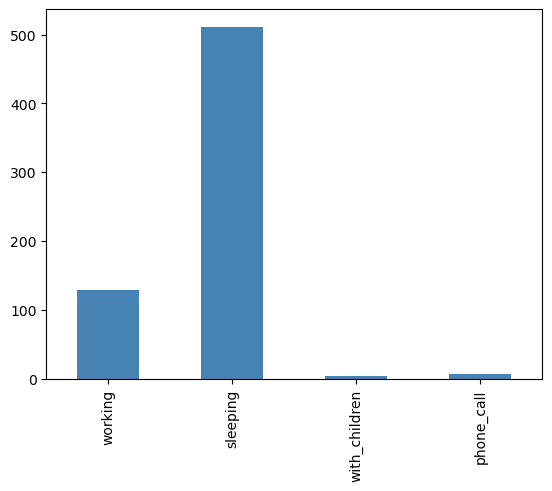

In [175]:
mean_summary.plot.bar(color = ['steelblue'])

We can see on an average, most time is spent sleeping. 

# 3. With respect to which activities do living environments differ?

#### Visualizing the distributions of time spent in habits based on living environments. 

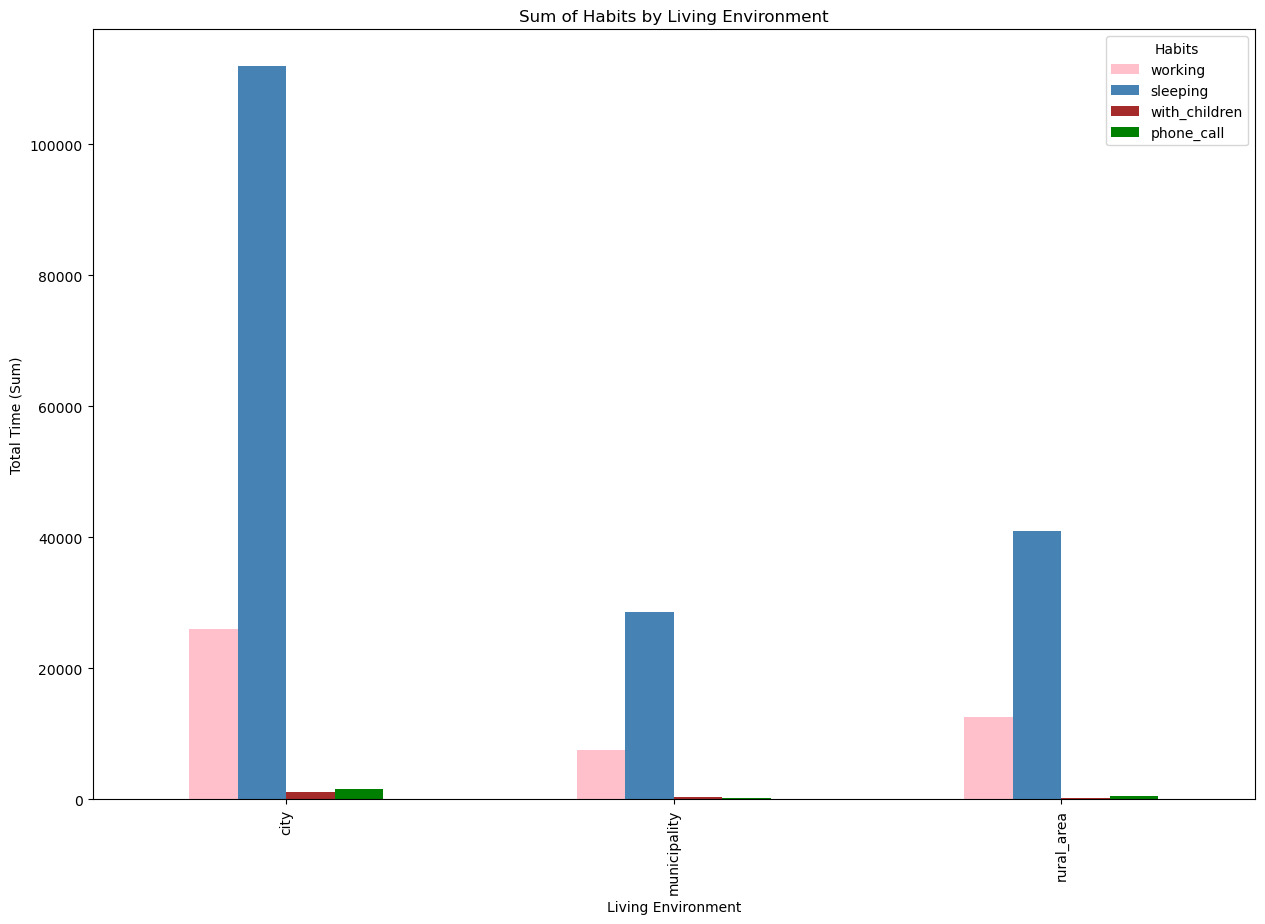

In [176]:
# Group by 'living_environment' and sum the values for each habit
grouped_data = df.groupby('living_environment')[['working', 'sleeping', 'with_children', 'phone_call']].sum()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar', color = ['pink',  'steelblue', 'brown','green', 'lightcoral', 'teal'],figsize=(15, 10), title="Sum of Habits by Living Environment")

# Customize the plot
plt.xlabel("Living Environment")
plt.ylabel("Total Time (Sum)")
plt.legend(title="Habits") 
plt.show()

At first glance, the bar graph shows that living environments differ mainly in the total time spent on working and sleeping. But without performing proper hypothesis testing, we cannot conclude anything. 

#### Hypothesis testing 1:

Independent variable: living environment

Dependent variable: Habits

Hypothesis: The time spent on the habits differs depending on the living environment.

Null hypothesis: The time spent on the habits does not differ depending on the living environment.

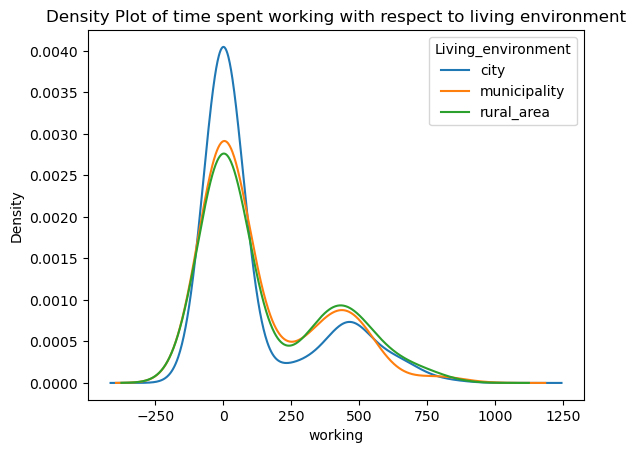

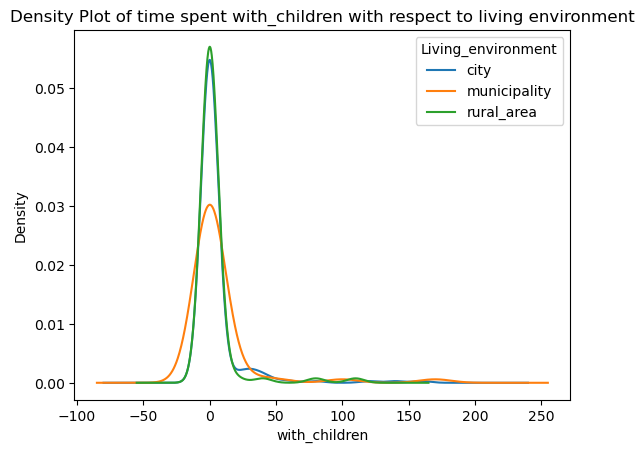

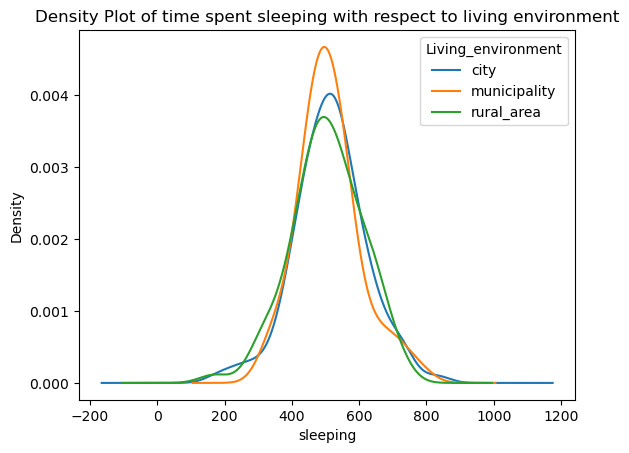

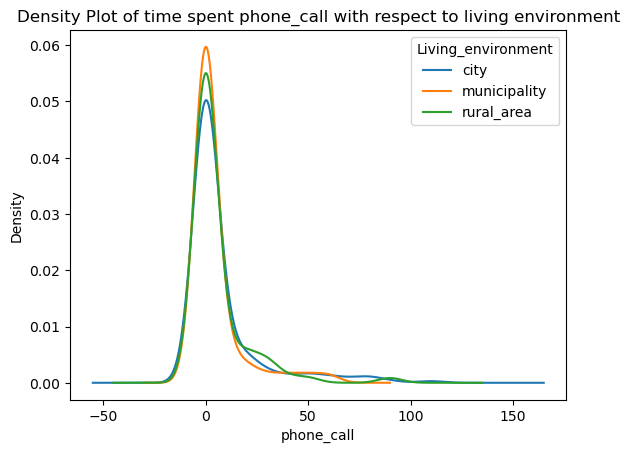

In [177]:
#Making Density plots for all the data to check for normality
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    grouped1 = df.groupby('living_environment')[[i]]
    plt.figure()
    plt.title(f"Density Plot of time spent {i} with respect to living environment")
    plt.xlabel(i)
    plt.ylabel("Density")
    for day, group in grouped1:
        group[i].plot.density(label= day)  
    plt.legend(title= 'Living_environment')
plt.show()

#We can also use histograms to check for normality.
#since we already used them earlier, we decided to use density plots as they serve the same purpose.

Grouping data in terms of the living environment and getting the summary results of Wilk Shapiro test to check for their normality.

In [178]:
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    print('')
    print(i)
    group_shap2 = df.groupby('living_environment')[[i]].apply(lambda a: S.shapiro(a)[1])
    print(group_shap2)


working
living_environment
city            3.033256e-22
municipality    6.042153e-10
rural_area      1.084383e-11
dtype: float64

with_children
living_environment
city            1.823096e-28
municipality    3.494378e-15
rural_area      1.152502e-18
dtype: float64

sleeping
living_environment
city            0.037190
municipality    0.083315
rural_area      0.475941
dtype: float64

phone_call
living_environment
city            6.691411e-25
municipality    2.350199e-13
rural_area      1.010059e-15
dtype: float64


Since only two values (the time spent sleeping in municipality and rural areas) have p-values greater than 0.05, only these two distributions can be considered normal. The rest are not normally distributed, as confirmed by their p-values and the non-normal shapes of their density plots.

Given the relatively small sample size and the presence of more than two variables for comparison, we will use the Kruskal-Wallis test, which is appropriate for non-parametric, multi-group comparisons.

In [179]:
working = S.kruskal(df.loc[df.living_environment == 'city', 'working'],df.loc[df.living_environment == 'rural_area', 'working'],df.loc[df.living_environment == 'municipality', 'working'])[1]
print("working :",working)
sleeping = S.kruskal(df.loc[df.living_environment == 'city', 'sleeping'],df.loc[df.living_environment == 'rural_area', 'sleeping'],df.loc[df.living_environment == 'municipality', 'sleeping'])[1]
print("sleeping :",sleeping)
with_children = S.kruskal(df.loc[df.living_environment == 'city', 'with_children'],df.loc[df.living_environment == 'rural_area', 'with_children'],df.loc[df.living_environment == 'municipality', 'with_children'])[1]
print("With_children :",With_children)
phone_call = S.kruskal(df.loc[df.living_environment == 'city', 'phone_call'],df.loc[df.living_environment == 'rural_area', 'phone_call'],df.loc[df.living_environment == 'municipality', 'phone_call'])[1]
print("phone_call :",phone_call)

working : 0.29173413647038876
sleeping : 0.7963128039382683
With_children : 0.002005880631496963
phone_call : 0.611954406469758


The p-values are all greater than 0.05. Therefore, We accept the null hypothesis for all the habits.

Conclusion : People's time spent in all the habits does not differ based on the type of their living environment. 

#### Relation between living environment and categorical habits using Chi-Square

In [180]:
# Contingency table for visit_theater
contingency_theater = P.crosstab(df['living_environment'], df['visit_theater'])
print (f"{contingency_theater}\n")
# Chi-square test for visit_theater
chi2_theater, p_theater, dof_theater, expected_theater = S.chi2_contingency(contingency_theater)
print(f"Chi-Square Test for visit_theater:")
print(f"Chi2 Statistic: {chi2_theater}, p-value: {p_theater} \n")


# Contingency table for visit_sport_event
contingency_sport_event = P.crosstab(df['living_environment'], df['visit_sport_event'])
print(f"{contingency_sport_event} \n")
# Chi-square test for visit_sport_event
chi2_sport_event, p_sport_event, dof_sport_event, expected_sport_event = S.chi2_contingency(contingency_sport_event)
print(f"Chi-Square Test for visit_sport_event:")
print(f"Chi2 Statistic: {chi2_sport_event}, p-value: {p_sport_event}")

visit_theater       yes   no
living_environment          
city                109  109
municipality         28   28
rural_area           31   50

Chi-Square Test for visit_theater:
Chi2 Statistic: 3.449770620930754, p-value: 0.17819348752914993 

visit_sport_event   yes   no
living_environment          
city                 90  128
municipality         20   36
rural_area           23   58 

Chi-Square Test for visit_sport_event:
Chi2 Statistic: 4.27474114853879, p-value: 0.1179646147757842


The p-values are all greater than 0.05. Therefoere, We accept the null hypothesis for all the habits.

Conclusion : The conclusion remains the same. People's time spent in all the habits does not differ based on the type of their living environment. 

# 4. With respect to which activities do working days and weekends differ?

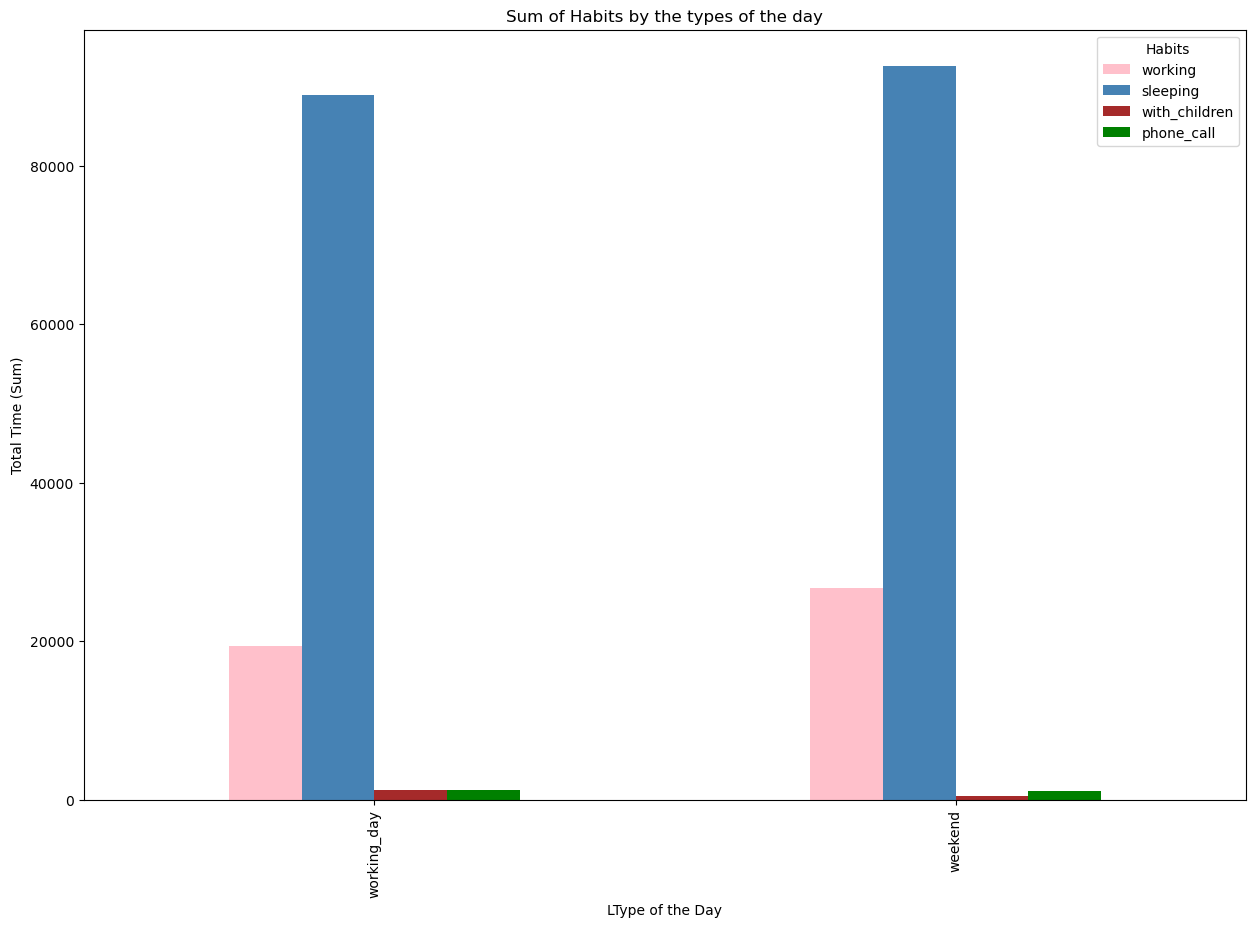

In [181]:
# Group by 'Type of day' and sum the values for each habit
grouped_data = df.groupby('day')[['working', 'sleeping', 'with_children', 'phone_call']].sum()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar', color = ['pink',  'steelblue', 'brown','green'], figsize=(15, 10), title="Sum of Habits by the types of the day")

# Customize the plot
plt.xlabel("LType of the Day")
plt.ylabel("Total Time (Sum)")
plt.legend(title="Habits")  
plt.show()

At first look, the bar graph shows that type of day differ mainly in the total time spent on working and sleeping. But without hypothesis testing, we cannot conclude anything. 

#### Hypothesis testing 2:

Independent variable: Type of the day

Dependent variable: Habits

Hypothesis: The time spent on the habits differs depending on the type of day.

Null hypothesis: The time spent on the habits does not differ depending on the type of day.

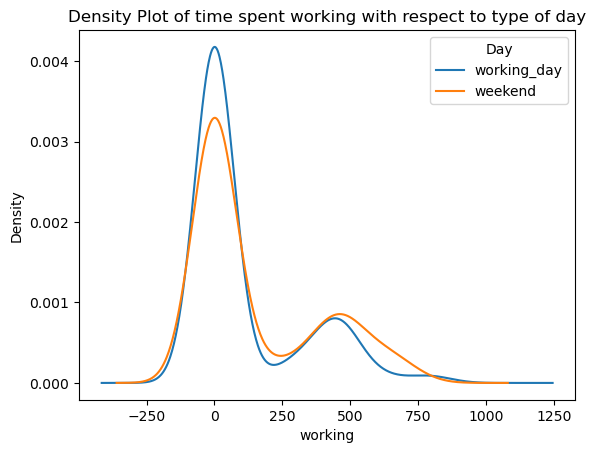

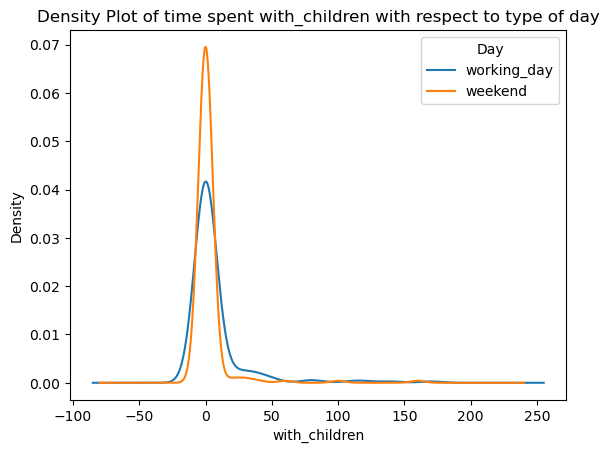

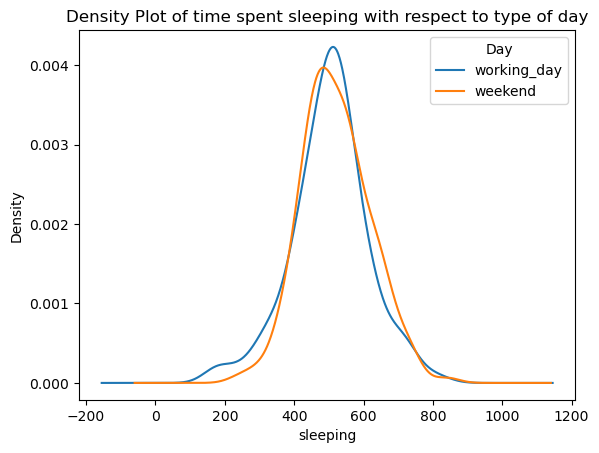

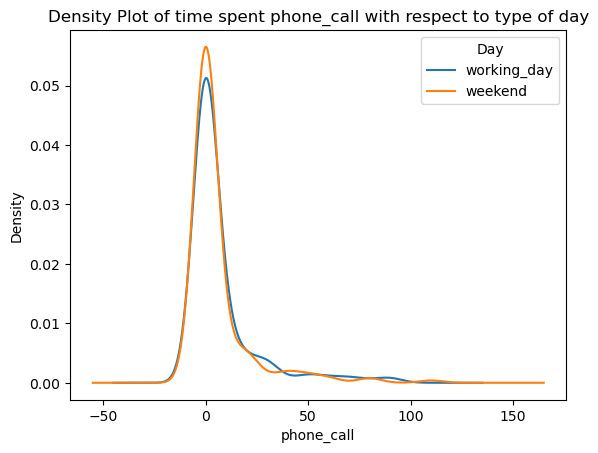

In [182]:
#Making Density plots for all the data to check for normality
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    grouped = df.groupby('day')[[i]]
    plt.figure()
    plt.title(f"Density Plot of time spent {i} with respect to type of day")
    plt.xlabel(i)
    plt.ylabel("Density")
    for day, group in grouped:
        group[i].plot.density(label= day)
    plt.legend(title='Day')
plt.show()

Grouping data in terms of the the type of day and getting the summary results of Wilk Shapiro test to check for their normality.

In [183]:
#Grouping data in terms of the DAY and getting the summary results of Wilk Shapiro test to check for their normality
quant_cols = ['working', 'with_children', 'sleeping', 'phone_call']
for i in quant_cols:
    print('')
    print(i)
    group_shap = df.groupby('day')[[i]].apply(lambda a: S.shapiro(a)[1])
    print(group_shap)


working
day
working_day    2.441228e-20
weekend        2.186760e-18
dtype: float64

with_children
day
working_day    5.069636e-25
weekend        1.520599e-27
dtype: float64

sleeping
day
working_day    0.010129
weekend        0.425974
dtype: float64

phone_call
day
working_day    1.961052e-22
weekend        2.024219e-23
dtype: float64


Since only one value (the time spent sleeping on weekend) has p-value greater than 0.05, only this distribution can be considered normal. The rest are not normally distributed, as confirmed by their p-values and the non-normal shapes of their density plots.

Given the relatively small sample size and the presence of only two variables for comparison, we will use the Mannwhitney U-test.

In [184]:
working = S.mannwhitneyu(df.loc[df.day == 'weekend', 'working'],df.loc[df.day == 'working_day', 'working'])[1]
print("working :",working)
sleeping = S.mannwhitneyu(df.loc[df.day == 'weekend', 'sleeping'],df.loc[df.day == 'working_day', 'sleeping'])[1]
print("sleeping :",sleeping)
With_children = S.mannwhitneyu(df.loc[df.day == 'weekend', 'with_children'],df.loc[df.day == 'working_day', 'with_children'])[1]
print("With_children :",With_children)
phone_call = S.mannwhitneyu(df.loc[df.day == 'weekend', 'phone_call'],df.loc[df.day == 'working_day', 'phone_call'])[1]
print("phone_call :",phone_call)

working : 0.07521015505393244
sleeping : 0.2508248102644771
With_children : 0.002005880631496963
phone_call : 0.3215292230767559


Only the P-value of time spent with children is less than 0.05. No other habit significantly differs based on the type of day, except the time spent with children. Therefore, we reject the null hypothesis for time spent with children and accept it in terms of all the other habits. 

Conclusion : The time spent with children does differ based on the type of day.

#### Relation between type of day and categorical habits using Chi-Square

In [185]:
contingency_theater_day = P.crosstab(df['day'], df['visit_theater'])
print (f"{contingency_theater_day}\n")

# Chi-square test for visit_theater
chi2_theater, p_theater, dof_theater, expected_theater = S.chi2_contingency(contingency_theater_day)
print(f"Chi-Square Test for visit_theater:")
print(f"Chi2 Statistic: {chi2_theater}, p-value: {p_theater} \n")

# Contingency table for visit_sport_event
contingency_sport_event_day = P.crosstab(df['day'], df['visit_sport_event'])
print (f"{contingency_sport_event_day}\n")

# Chi-square test for visit_sport_event
chi2_sport_event, p_sport_event, dof_sport_event, expected_sport_event = S.chi2_contingency(contingency_sport_event_day)
print(f"Chi-Square Test for visit_sport_event:")
print(f"Chi2 Statistic: {chi2_sport_event}, p-value: {p_sport_event}")

visit_theater  yes  no
day                   
working_day     85  92
weekend         83  95

Chi-Square Test for visit_theater:
Chi2 Statistic: 0.024526048488045547, p-value: 0.8755538404826417 

visit_sport_event  yes   no
day                        
working_day         63  114
weekend             70  108

Chi-Square Test for visit_sport_event:
Chi2 Statistic: 0.3804754219806758, p-value: 0.5373489083423546


The p-values are all greater than 0.05. Therefore, We accept the null hypothesis for the two categorical habits. 

Conclusion : The conclusion remains the same. Only time spent with children does differ based on the type of day. 

# 5. Which activities are associated with each other?

To check for any correlations between different habits, we perform spearman correlation on all the habits (Because not all habits are normally distributed).

In [186]:
# Identify spearman correlation between habits
habits_corr = df[quant_cols].corr(method='spearman')
print("Habits Correlation Table:\n", habits_corr)

Habits Correlation Table:
                 working  with_children  sleeping  phone_call
working        1.000000      -0.003566 -0.345593   -0.102921
with_children -0.003566       1.000000  0.041588    0.072380
sleeping      -0.345593       0.041588  1.000000   -0.041442
phone_call    -0.102921       0.072380 -0.041442    1.000000


Visualizing the correlations between habits using a scatter plot to check for prevailing trends or patterns.

array([[<Axes: xlabel='working', ylabel='working'>,
        <Axes: xlabel='with_children', ylabel='working'>,
        <Axes: xlabel='sleeping', ylabel='working'>,
        <Axes: xlabel='phone_call', ylabel='working'>],
       [<Axes: xlabel='working', ylabel='with_children'>,
        <Axes: xlabel='with_children', ylabel='with_children'>,
        <Axes: xlabel='sleeping', ylabel='with_children'>,
        <Axes: xlabel='phone_call', ylabel='with_children'>],
       [<Axes: xlabel='working', ylabel='sleeping'>,
        <Axes: xlabel='with_children', ylabel='sleeping'>,
        <Axes: xlabel='sleeping', ylabel='sleeping'>,
        <Axes: xlabel='phone_call', ylabel='sleeping'>],
       [<Axes: xlabel='working', ylabel='phone_call'>,
        <Axes: xlabel='with_children', ylabel='phone_call'>,
        <Axes: xlabel='sleeping', ylabel='phone_call'>,
        <Axes: xlabel='phone_call', ylabel='phone_call'>]], dtype=object)

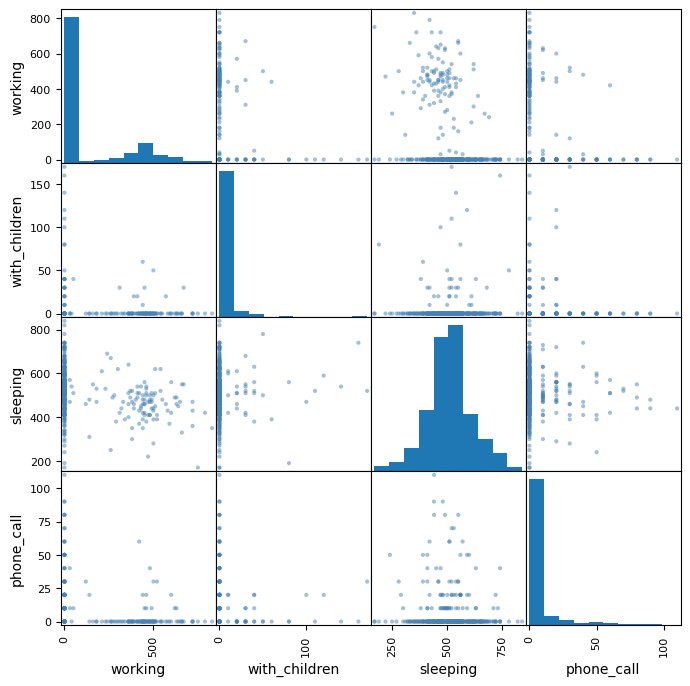

In [187]:
P.plotting.scatter_matrix(df[quant_cols], color = ['steelblue'], figsize=(8,8))

By considering the correlation table and the scatter plot, it is revealed that most habits have very weak correlations, showing minimal relationship. The relation that comes the closest to a negative correlation is between working and sleeping (with a value of -0.322), suggesting that more work reduces sleep. Other activity pairs show negligible or no significant relationships.